<a href="https://colab.research.google.com/github/ergul13/mr_akgul/blob/main/%C3%A7oklu_s%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### VERİ SETİ ANALİZİ: RSNA_Cropped ###
Yol: /content/drive/MyDrive/RSNA_Cropped
Uyarı: Alt klasör (sınıf yapısı) bulunamadı. Doğrudan dosyalar analiz ediliyor.
Toplam PNG Sayısı: 54706


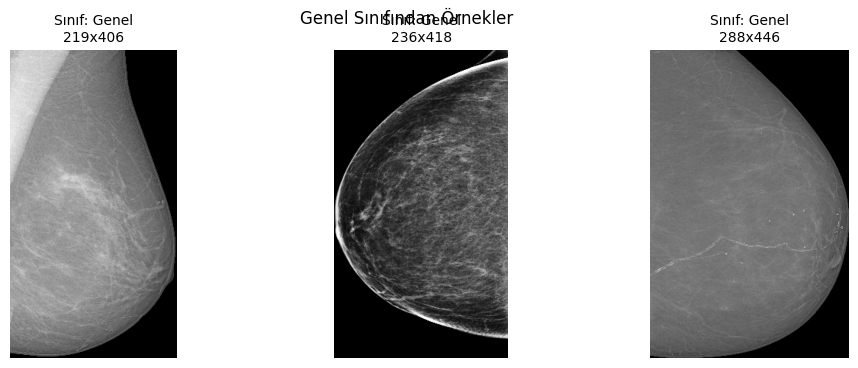

### VERİ SETİ ANALİZİ: INbreast_Cropped ###
Yol: /content/drive/MyDrive/INbreast_Cropped
Uyarı: Alt klasör (sınıf yapısı) bulunamadı. Doğrudan dosyalar analiz ediliyor.
Toplam PNG Sayısı: 410


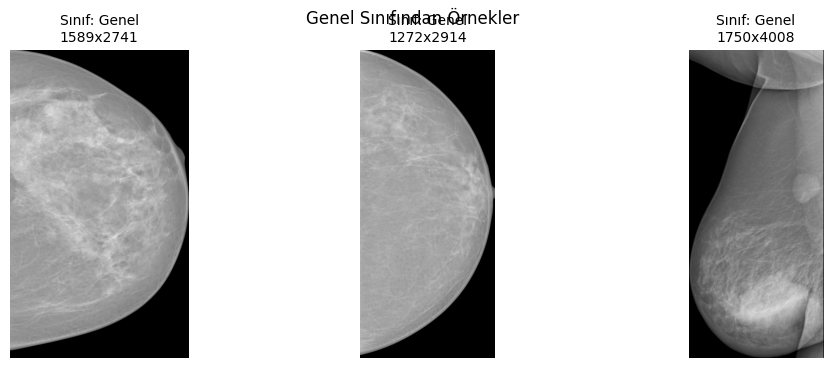

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

# Analiz edilecek ana yollar (Bulunan sonuçlara göre)
paths_to_inspect = [
    '/content/drive/MyDrive/RSNA_Cropped',
    '/content/drive/MyDrive/INbreast_Cropped'
]

def inspect_dataset(base_path):
    dataset_name = os.path.basename(base_path)
    print(f"### VERİ SETİ ANALİZİ: {dataset_name} ###")
    print(f"Yol: {base_path}")

    # Alt klasörleri (Sınıfları) bul
    classes = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    classes.sort()

    # Eğer alt klasör yoksa (düz yapıysa)
    if not classes:
        print("Uyarı: Alt klasör (sınıf yapısı) bulunamadı. Doğrudan dosyalar analiz ediliyor.")
        files = [f for f in os.listdir(base_path) if f.lower().endswith('.png')]
        print(f"Toplam PNG Sayısı: {len(files)}")
        if len(files) > 0:
            visualize_samples(base_path, files, "Genel")
        return

    # Sınıf bazlı analiz
    stats = []
    for cls in classes:
        cls_path = os.path.join(base_path, cls)
        files = [f for f in os.listdir(cls_path) if f.lower().endswith('.png')]
        count = len(files)
        stats.append({'Sınıf': cls, 'Görüntü Sayısı': count})

        # Görselleştirme (Her sınıftan örnekler)
        if count > 0:
            visualize_samples(cls_path, files, cls)

    # Dağılım Tablosu
    df = pd.DataFrame(stats)
    print(f"\n[{dataset_name}] Sınıf Dağılımı:")
    print(df.to_string(index=False))
    print("\n" + "="*60 + "\n")

def visualize_samples(path, file_list, title):
    # Rastgele 3 görsel seç
    samples = random.sample(file_list, min(3, len(file_list)))

    plt.figure(figsize=(12, 4))
    for i, img_file in enumerate(samples):
        img_path = os.path.join(path, img_file)
        img = cv2.imread(img_path)

        if img is not None:
            # Görüntü özelliklerini al
            h, w, c = img.shape
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, 3, i+1)
            plt.imshow(img_rgb, cmap='gray')
            plt.title(f"Sınıf: {title}\n{w}x{h}", fontsize=10)
            plt.axis('off')

    plt.suptitle(f"{title} Sınıfından Örnekler", fontsize=12)
    plt.show()

# Analizi başlat
for p in paths_to_inspect:
    if os.path.exists(p):
        inspect_dataset(p)
    else:
        print(f"HATA: Yol bulunamadı -> {p}")

In [7]:
import os
import pandas as pd

# Tarama yapılacak ana dizin
root_path = '/content/drive/MyDrive'

def find_and_analyze_csv(start_path):
    print("Drive içinde CSV dosyaları aranıyor...")
    csv_files = []

    # Tüm Drive'ı tara ve CSV'leri bul
    for root, dirs, files in os.walk(start_path):
        for file in files:
            if file.lower().endswith('.csv'):
                full_path = os.path.join(root, file)
                # Sadece projenle ilgili olabilecek CSV'leri filtreleyelim (boyut veya isim kontrolü)
                if 'train' in file.lower() or 'test' in file.lower() or 'meta' in file.lower() or 'breast' in file.lower():
                    csv_files.append(full_path)

    if not csv_files:
        print("İlgili CSV dosyası bulunamadı.")
        return None

    print(f"\nBulunan Olası Veri Seti Dosyaları ({len(csv_files)} adet):")
    for i, csv_path in enumerate(csv_files):
        print(f"[{i+1}] {csv_path}")

    print("-" * 50)

    # İlk bulunan (veya en olası) CSV'yi okuyup sütunlarına bakalım
    # Genelde 'train.csv' veya benzeri dosyalarda etiketler olur.
    for csv_path in csv_files:
        try:
            df = pd.read_csv(csv_path)
            print(f"\nDosya İnceleniyor: {os.path.basename(csv_path)}")
            print(f"Sütun İsimleri: {list(df.columns)}")
            print(f"İlk 3 Satır:\n{df.head(3)}")

            # RSNA veya INbreast kontrolü
            if 'image_id' in df.columns or 'patient_id' in df.columns:
                print("-> Bu dosya görüntü ID'lerini içeriyor gibi görünüyor.")
            if 'cancer' in df.columns or 'BIRADS' in df.columns:
                print("-> Bu dosya ETİKET (Label) bilgisini içeriyor.")

            print("-" * 30)
        except Exception as e:
            print(f"Hata: {csv_path} okunamadı. Sebebi: {e}")

# Fonksiyonu çalıştır
find_and_analyze_csv(root_path)

Drive içinde CSV dosyaları aranıyor...

Bulunan Olası Veri Seti Dosyaları (4 adet):
[1] /content/drive/MyDrive/INbreast.csv
[2] /content/drive/MyDrive/train.csv
[3] /content/drive/MyDrive/SPLIT_DATA/train.csv
[4] /content/drive/MyDrive/SPLIT_DATA/test.csv
--------------------------------------------------

Dosya İnceleniyor: INbreast.csv
Sütun İsimleri: ['Patient ID;Patient age;Laterality;View;Acquisition date;File Name;ACR;Bi-Rads']
İlk 3 Satır:
  Patient ID;Patient age;Laterality;View;Acquisition date;File Name;ACR;Bi-Rads
0           removed;removed;R;CC;201001;22678622;4;1                           
1           removed;removed;L;CC;201001;22678646;4;3                           
2          removed;removed;R;MLO;201001;22678670;4;1                           
------------------------------

Dosya İnceleniyor: train.csv
Sütun İsimleri: ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density', 'machine_id', 'diffic

Eğitim Verisi Satır Sayısı: 44092
Test Verisi Satır Sayısı: 5512
--------------------------------------------------
Eğitim Seti Sınıf Dağılımı (BI-RADS):
label
1    42891
2      194
4       35
5      972
Name: count, dtype: int64

Veri Kaynağı Dağılımı (RSNA / INbreast):
source
RSNA        43759
INbreast      333
Name: count, dtype: int64
--------------------------------------------------
İşlenmiş Veri Örnekleri (224x224 - Grayscale):


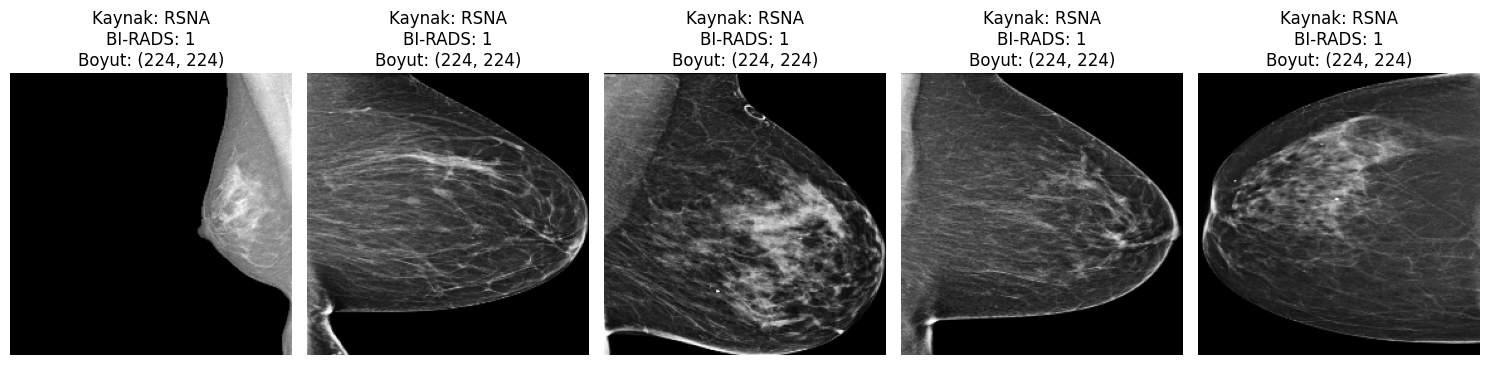

In [8]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random

# 1. Veri Setlerini Yükleme
train_csv_path = '/content/drive/MyDrive/SPLIT_DATA/train.csv'
test_csv_path = '/content/drive/MyDrive/SPLIT_DATA/test.csv'

# Verileri oku
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

print(f"Eğitim Verisi Satır Sayısı: {len(df_train)}")
print(f"Test Verisi Satır Sayısı: {len(df_test)}")
print("-" * 50)

# 2. Sınıf Dağılımı Analizi (BI-RADS Sınıfları)
# 'label' sütunu BI-RADS skorlarını tutuyor gibi görünüyor.
print("Eğitim Seti Sınıf Dağılımı (BI-RADS):")
print(df_train['label'].value_counts().sort_index())

print("\nVeri Kaynağı Dağılımı (RSNA / INbreast):")
print(df_train['source'].value_counts())
print("-" * 50)

# 3. Görselleştirme ve 224x224 Resize İşlemi
def visualize_prepared_data(df, num_samples=5):
    plt.figure(figsize=(15, 5))

    # Rastgele örnekler seç
    sample_indices = random.sample(range(len(df)), num_samples)

    for i, idx in enumerate(sample_indices):
        row = df.iloc[idx]
        img_path = row['path']
        label = row['label']
        source = row['source']

        # Görüntüyü oku
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            # BGR -> Gray (Raporda Grayscale istendiği belirtilmiş )
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Direkt Resize (224x224)
            img_resized = cv2.resize(img_gray, (224, 224))

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img_resized, cmap='gray')
            plt.title(f"Kaynak: {source}\nBI-RADS: {label}\nBoyut: {img_resized.shape}")
            plt.axis('off')
        else:
            print(f"Hata: Dosya bulunamadı -> {img_path}")

    plt.tight_layout()
    plt.show()

print("İşlenmiş Veri Örnekleri (224x224 - Grayscale):")
visualize_prepared_data(df_train)



--- BI-RADS 4 (Toplam 35 adet) Örnekleri ---


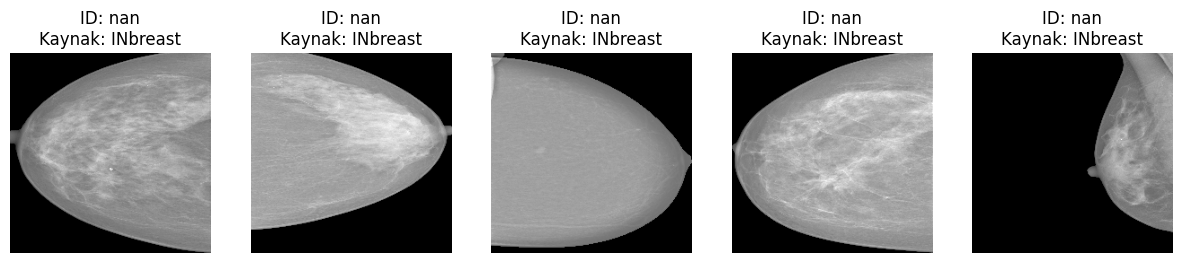


--- BI-RADS 2 (Toplam 194 adet) Örnekleri ---


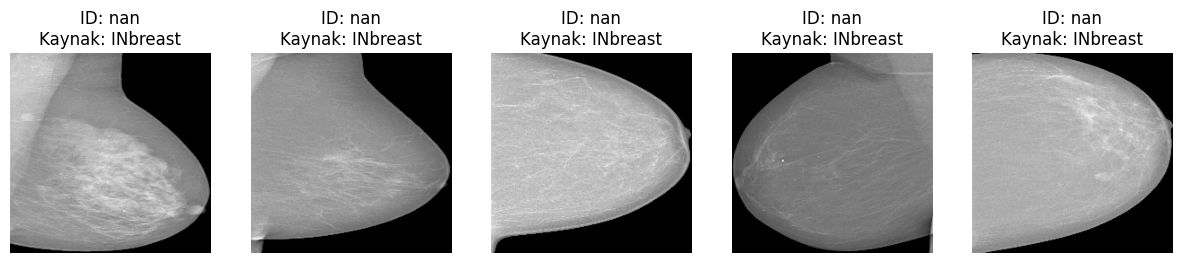


NEGATİF TABANLI KOLEKTİF ÖĞRENME VERİ DAĞILIMI
[Model_1 (BI-RADS 1 Tespiti)]
  Pozitif Örnek Sayısı (Hedef Sınıf): 42891
  Negatif Örnek Sayısı (Diğerleri)  : 1201
  Dengesizlik Oranı                 : 1 : 0.0
------------------------------
[Model_2 (BI-RADS 2 Tespiti)]
  Pozitif Örnek Sayısı (Hedef Sınıf): 194
  Negatif Örnek Sayısı (Diğerleri)  : 43898
  Dengesizlik Oranı                 : 1 : 226.3
------------------------------
[Model_3 (BI-RADS 4 Tespiti)]
  Pozitif Örnek Sayısı (Hedef Sınıf): 35
  Negatif Örnek Sayısı (Diğerleri)  : 44057
  Dengesizlik Oranı                 : 1 : 1258.8
  UYARI: Pozitif örnek sayısı eğitim için çok düşük. Veri artırma (Augmentation) şart.
------------------------------
[Model_4 (BI-RADS 5 Tespiti)]
  Pozitif Örnek Sayısı (Hedef Sınıf): 972
  Negatif Örnek Sayısı (Diğerleri)  : 43120
  Dengesizlik Oranı                 : 1 : 44.4
------------------------------


In [9]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

# Önceki koddan df_train'in hafızada olduğunu varsayıyoruz.
# Eğer değilse tekrar yükleyelim:
if 'df_train' not in locals():
    df_train = pd.read_csv('/content/drive/MyDrive/SPLIT_DATA/train.csv')

def visualize_rare_classes(df, class_id, num_samples=5):
    rare_data = df[df['label'] == class_id]
    count = len(rare_data)

    if count == 0:
        print(f"Sınıf {class_id} için veri bulunamadı.")
        return

    print(f"\n--- BI-RADS {class_id} (Toplam {count} adet) Örnekleri ---")

    plt.figure(figsize=(15, 4))
    # Veri sayısı istenenden azsa hepsini göster
    samples = rare_data.sample(min(num_samples, count))

    for i, (_, row) in enumerate(samples.iterrows()):
        img_path = row['path']
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224, 224))

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"ID: {row['image_id']}\nKaynak: {row['source']}")
            plt.axis('off')
        else:
            print(f"Dosya bulunamadı: {img_path}")
    plt.show()

# 1. Kritik Sınıfların Görsel Kontrolü
visualize_rare_classes(df_train, 4) # En kritik sınıf (35 adet)
visualize_rare_classes(df_train, 2) # İkinci kritik sınıf (194 adet)

# 2. Rapor Formatına Göre Veri Hazırlığı Analizi (Şekil 1 Mantığı)
print("\n" + "="*50)
print("NEGATİF TABANLI KOLEKTİF ÖĞRENME VERİ DAĞILIMI")
print("="*50)

# Rapordaki 4 Modelin Tanımları
models_config = {
    "Model_1 (BI-RADS 1 Tespiti)": {"pos": [1], "neg": [2, 4, 5]},
    "Model_2 (BI-RADS 2 Tespiti)": {"pos": [2], "neg": [1, 4, 5]},
    "Model_3 (BI-RADS 4 Tespiti)": {"pos": [4], "neg": [1, 2, 5]},
    "Model_4 (BI-RADS 5 Tespiti)": {"pos": [5], "neg": [1, 2, 4]}
}

for model_name, config in models_config.items():
    pos_counts = df_train[df_train['label'].isin(config['pos'])].shape[0]
    neg_counts = df_train[df_train['label'].isin(config['neg'])].shape[0]

    ratio = neg_counts / pos_counts if pos_counts > 0 else 0

    print(f"[{model_name}]")
    print(f"  Pozitif Örnek Sayısı (Hedef Sınıf): {pos_counts}")
    print(f"  Negatif Örnek Sayısı (Diğerleri)  : {neg_counts}")
    print(f"  Dengesizlik Oranı                 : 1 : {ratio:.1f}")

    if pos_counts < 100:
        print("  UYARI: Pozitif örnek sayısı eğitim için çok düşük. Veri artırma (Augmentation) şart.")
    print("-" * 30)

In [10]:
import pandas as pd

# CSV'leri tekrar tanımlayalım (hafızada yoksa diye)
train_csv_path = '/content/drive/MyDrive/SPLIT_DATA/train.csv'
test_csv_path = '/content/drive/MyDrive/SPLIT_DATA/test.csv'

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

# Sınıf bazlı sayım
train_counts = df_train['label'].value_counts().sort_index()
test_counts = df_test['label'].value_counts().sort_index()

print("=== EĞİTİM vs TEST DAĞILIMI VE ORANLARI ===")
print(f"{'Sınıf':<10} {'Eğitim':<10} {'Test':<10} {'Toplam':<10} {'Eğitim Oranı (%)'}")
print("-" * 60)

all_labels = sorted(list(set(train_counts.index) | set(test_counts.index)))

for label in all_labels:
    tr_c = train_counts.get(label, 0)
    te_c = test_counts.get(label, 0)
    total = tr_c + te_c
    ratio = (tr_c / total * 100) if total > 0 else 0

    print(f"BI-RADS {label:<2} {tr_c:<10} {te_c:<10} {total:<10} %{ratio:.1f}")

print("-" * 60)
print(f"Genel Toplam: {len(df_train)} Eğitim, {len(df_test)} Test")

=== EĞİTİM vs TEST DAĞILIMI VE ORANLARI ===
Sınıf      Eğitim     Test       Toplam     Eğitim Oranı (%)
------------------------------------------------------------
BI-RADS 1  42891      5362       48253      %88.9
BI-RADS 2  194        25         219        %88.6
BI-RADS 4  35         4          39         %89.7
BI-RADS 5  972        121        1093       %88.9
------------------------------------------------------------
Genel Toplam: 44092 Eğitim, 5512 Test


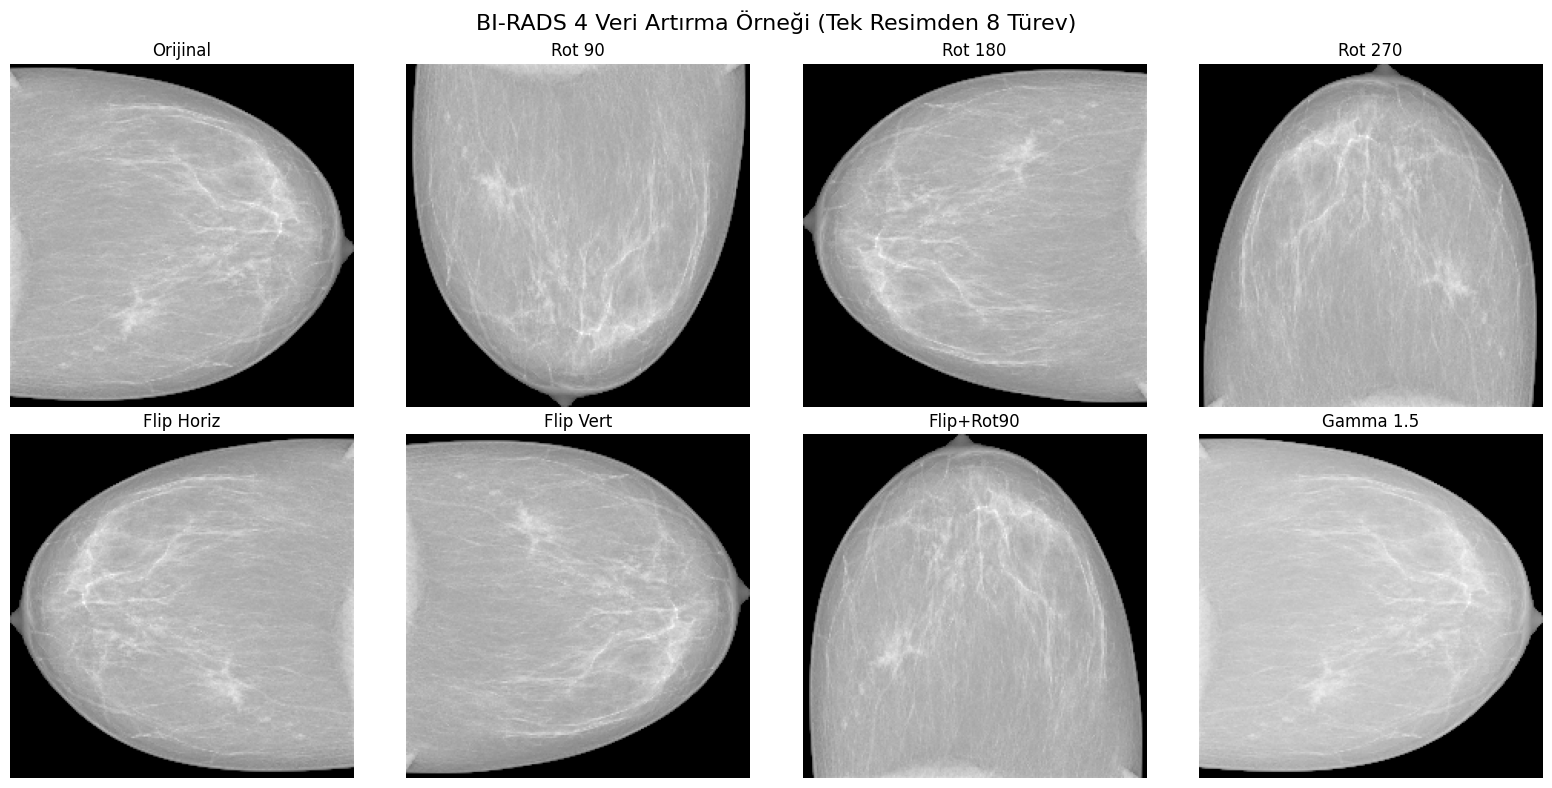

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# BI-RADS 4 sınıfından rastgele bir örnek alalım
rare_sample = df_train[df_train['label'] == 4].sample(1).iloc[0]
img_path = rare_sample['path']

def augment_and_visualize(image_path):
    if not os.path.exists(image_path):
        print("Dosya bulunamadı.")
        return

    # Görüntüyü oku (Grayscale)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224, 224))

    # Augmentation Teknikleri (Rapora uygun + Temel teknikler)
    # 1. Orijinal
    # 2. 90 Derece Döndür
    # 3. 180 Derece Döndür
    # 4. 270 Derece Döndür
    # 5. Yatay Aynalama (Mirror)
    # 6. Dikey Aynalama
    # 7. Yatay Aynalama + 90 Derece
    # 8. Gamma (Parlaklık) Değişimi

    aug_images = []
    titles = []

    # 1. Orijinal
    aug_images.append(img)
    titles.append("Orijinal")

    # 2. Rotate 90
    img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    aug_images.append(img_90)
    titles.append("Rot 90")

    # 3. Rotate 180
    img_180 = cv2.rotate(img, cv2.ROTATE_180)
    aug_images.append(img_180)
    titles.append("Rot 180")

    # 4. Rotate 270
    img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    aug_images.append(img_270)
    titles.append("Rot 270")

    # 5. Flip Horizontal
    img_fh = cv2.flip(img, 1)
    aug_images.append(img_fh)
    titles.append("Flip Horiz")

    # 6. Flip Vertical
    img_fv = cv2.flip(img, 0)
    aug_images.append(img_fv)
    titles.append("Flip Vert")

    # 7. Flip + Rot 90
    img_fr = cv2.rotate(img_fh, cv2.ROTATE_90_CLOCKWISE)
    aug_images.append(img_fr)
    titles.append("Flip+Rot90")

    # 8. Gamma Correction (Parlaklık)
    gamma = 1.5
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    aug_images.append(img_gamma)
    titles.append("Gamma 1.5")

    # Görselleştirme
    plt.figure(figsize=(16, 8))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(aug_images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.suptitle(f"BI-RADS 4 Veri Artırma Örneği (Tek Resimden 8 Türev)", fontsize=16)
    plt.tight_layout()
    plt.show()

augment_and_visualize(img_path)

In [12]:
import os
import pandas as pd

# 1. Klasör Yollarını Tanımla
split_dir = '/content/drive/MyDrive/SPLIT_DATA'
raw_csv_path = '/content/drive/MyDrive/INbreast.csv'

# 2. Validation (Doğrulama) Dosyasını Ara
print(f"'{split_dir}' klasörü taranıyor...")
if os.path.exists(split_dir):
    files = os.listdir(split_dir)
    val_files = [f for f in files if 'val' in f.lower()]

    val_count = 0
    if val_files:
        val_path = os.path.join(split_dir, val_files[0])
        print(f"Validation dosyası bulundu: {val_files[0]}")

        df_val = pd.read_csv(val_path)
        val_count = len(df_val[df_val['label'] == 4])
        print(f"Validation içindeki BI-RADS 4 Sayısı: {val_count}")
    else:
        print("Validation CSV dosyası bulunamadı.")

    # Hesaplama
    train_count = 35
    test_count = 4
    total_found = train_count + test_count + val_count

    print("-" * 40)
    print(f"Matematiksel Sağlama:")
    print(f"Train ({train_count}) + Test ({test_count}) + Val ({val_count}) = {total_found}")

    if total_found == 43:
        print("Harika! Tüm verilerin yeri tespit edildi.")
    else:
        print(f"Hala {43 - total_found} veri eksik.")

# 3. Orijinal INbreast Verisini Kontrol Et (Referans için)
if os.path.exists(raw_csv_path):
    print("\n--- Orijinal INbreast.csv Kontrolü ---")
    try:
        # INbreast genelde noktalı virgül (;) ile ayrılır
        df_raw = pd.read_csv(raw_csv_path, sep=';')

        # 'Bi-Rads' sütununu kontrol et
        if 'Bi-Rads' in df_raw.columns:
            # 4a, 4b, 4c gibi alt sınıfları da kapsayacak şekilde sayım yap
            df_raw['Bi-Rads'] = df_raw['Bi-Rads'].astype(str)
            raw_count = len(df_raw[df_raw['Bi-Rads'].str.startswith('4')])
            print(f"Orijinal Dosyadaki Toplam BI-RADS 4: {raw_count}")
    except Exception as e:
        print(f"Okuma hatası: {e}")

'/content/drive/MyDrive/SPLIT_DATA' klasörü taranıyor...
Validation dosyası bulundu: val.csv
Validation içindeki BI-RADS 4 Sayısı: 4
----------------------------------------
Matematiksel Sağlama:
Train (35) + Test (4) + Val (4) = 43
✅ Harika! Tüm verilerin yeri tespit edildi.

--- Orijinal INbreast.csv Kontrolü ---
Orijinal Dosyadaki Toplam BI-RADS 4: 43


In [13]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# 1. Ana Eğitim Verisini Yükle
df_train = pd.read_csv('/content/drive/MyDrive/SPLIT_DATA/train.csv')

def prepare_collective_learning_data(df, target_class, model_name):
    # Pozitif ve Negatif Sınıfları Ayır
    # Rapora göre: Hedef sınıf "Pozitif", diğerleri "Negatif" [cite: 186]
    df_pos = df[df['label'] == target_class].copy()
    df_neg = df[df['label'] != target_class].copy()

    # --- ADIM 1: Veri Artırma (Sanal) ---
    # Raporda "90 derece döndürülerek veri miktarı dört katına çıkarılacaktır" deniliyor.
    # Biz burada dosya yollarını çoğaltıp, eğitim sırasında "rotate" işlemi uygulayacağımızı işaretleyeceğiz.
    # Bu sayede diskte yer kaplamadan 4 kat veri elde ederiz.

    # Pozitif sınıf için augmentasyon (özellikle az veriler için kritik)
    augmented_pos = []
    for _, row in df_pos.iterrows():
        # 0 derece (Orijinal)
        augmented_pos.append({'path': row['path'], 'binary_label': 1, 'aug_type': 'original'})
        # 90 derece
        augmented_pos.append({'path': row['path'], 'binary_label': 1, 'aug_type': 'rot90'})
        # 180 derece
        augmented_pos.append({'path': row['path'], 'binary_label': 1, 'aug_type': 'rot180'})
        # 270 derece
        augmented_pos.append({'path': row['path'], 'binary_label': 1, 'aug_type': 'rot270'})

    df_pos_aug = pd.DataFrame(augmented_pos)

    # --- ADIM 2: Negatif Sınıf Dengeleme (Undersampling) ---
    # Raporda "rastgele seçilmiş diğer sınıfları içeren veriler" deniliyor.
    # Negatif veri sayısını, artırılmış pozitif veri sayısına eşitleyelim veya belirli bir oranda tutalım.
    # BI-RADS 4 gibi çok az verili sınıflar için 1:1 veya 1:2 oran iyidir.

    n_pos = len(df_pos_aug)

    # Negatiflerden rastgele seçim yap (Pozitif sayısının 2 katı kadar alalım ki model negatifleri de iyi öğrensin)
    # Eğer negatif sayısı yetersizse hepsini al.
    n_neg_sample = min(len(df_neg), n_pos * 2)

    df_neg_sampled = resample(df_neg, n_samples=n_neg_sample, replace=False, random_state=42)

    # Negatif verileri formatla (Bunlara rotasyon uygulamıyoruz, zaten çok varlar)
    neg_data = []
    for _, row in df_neg_sampled.iterrows():
        neg_data.append({'path': row['path'], 'binary_label': 0, 'aug_type': 'original'})

    df_neg_final = pd.DataFrame(neg_data)

    # --- ADIM 3: Birleştirme ve Karıştırma ---
    df_model = pd.concat([df_pos_aug, df_neg_final])
    df_model = df_model.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"[{model_name}] Hazırlandı:")
    print(f"  Hedef Sınıf (BI-RADS {target_class}) Orijinal Sayı: {len(df_pos)}")
    print(f"  Artırılmış Pozitif Sayısı (4x): {len(df_pos_aug)}")
    print(f"  Seçilen Negatif Sayısı: {len(df_neg_final)}")
    print(f"  Toplam Eğitim Verisi: {len(df_model)}")
    print("-" * 40)

    return df_model

print("=== NEGATİF TABANLI KOLEKTİF ÖĞRENME VERİ SETLERİ OLUŞTURULUYOR ===\n")

# 4 Farklı Model İçin Veri Setlerini Oluştur
df_model_1 = prepare_collective_learning_data(df_train, target_class=1, model_name="Model 1 (BI-RADS 1 Tespit)")
df_model_2 = prepare_collective_learning_data(df_train, target_class=2, model_name="Model 2 (BI-RADS 2 Tespit)")
df_model_3 = prepare_collective_learning_data(df_train, target_class=4, model_name="Model 3 (BI-RADS 4 Tespit)")
df_model_4 = prepare_collective_learning_data(df_train, target_class=5, model_name="Model 4 (BI-RADS 5 Tespit)")

# Örnek olarak Model 3 (En kritik olan) veri setinin başını gösterelim
print("\nModel 3 (BI-RADS 4) Veri Seti Örneği:")
print(df_model_3.head())

=== NEGATİF TABANLI KOLEKTİF ÖĞRENME VERİ SETLERİ OLUŞTURULUYOR ===

[Model 1 (BI-RADS 1 Tespit)] Hazırlandı:
  Hedef Sınıf (BI-RADS 1) Orijinal Sayı: 42891
  Artırılmış Pozitif Sayısı (4x): 171564
  Seçilen Negatif Sayısı: 1201
  Toplam Eğitim Verisi: 172765
----------------------------------------
[Model 2 (BI-RADS 2 Tespit)] Hazırlandı:
  Hedef Sınıf (BI-RADS 2) Orijinal Sayı: 194
  Artırılmış Pozitif Sayısı (4x): 776
  Seçilen Negatif Sayısı: 1552
  Toplam Eğitim Verisi: 2328
----------------------------------------
[Model 3 (BI-RADS 4 Tespit)] Hazırlandı:
  Hedef Sınıf (BI-RADS 4) Orijinal Sayı: 35
  Artırılmış Pozitif Sayısı (4x): 140
  Seçilen Negatif Sayısı: 280
  Toplam Eğitim Verisi: 420
----------------------------------------
[Model 4 (BI-RADS 5 Tespit)] Hazırlandı:
  Hedef Sınıf (BI-RADS 5) Orijinal Sayı: 972
  Artırılmış Pozitif Sayısı (4x): 3888
  Seçilen Negatif Sayısı: 7776
  Toplam Eğitim Verisi: 11664
----------------------------------------

Model 3 (BI-RADS 4) Veri

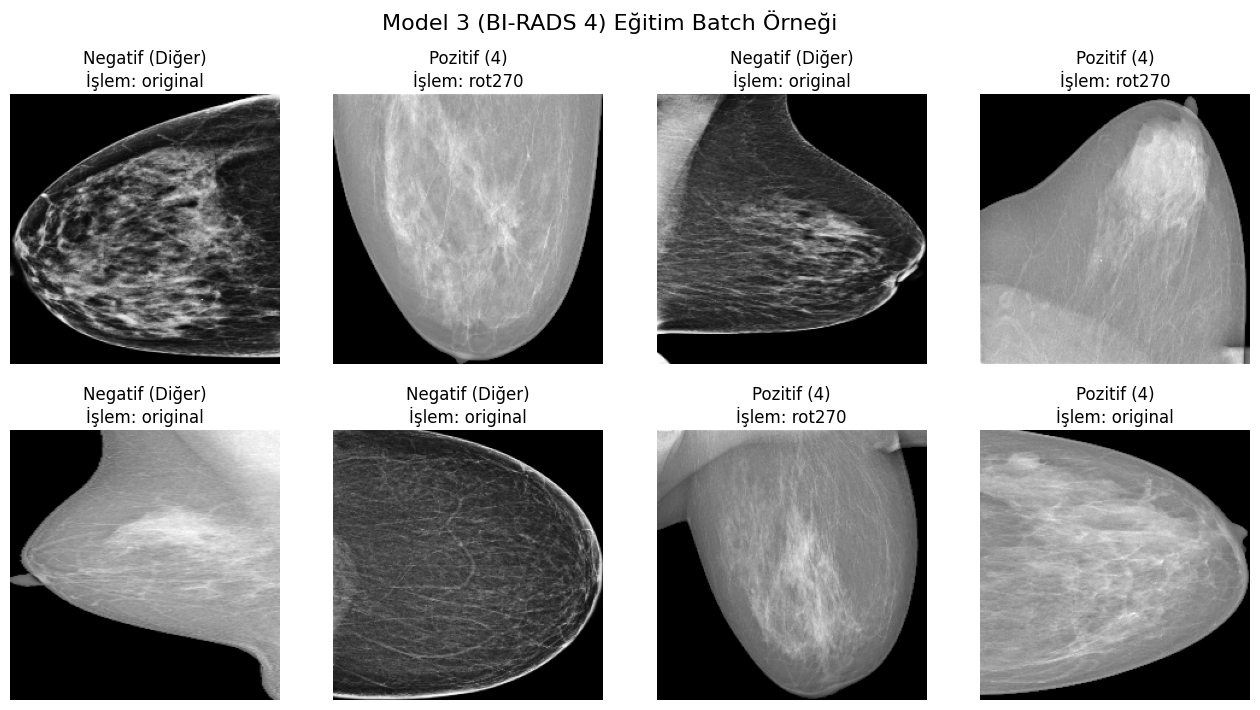

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

class MammographyDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Veri satırını al
        row = self.dataframe.iloc[idx]
        img_path = row['path']
        label = row['binary_label']
        aug_type = row['aug_type']

        # 1. Görüntüyü Oku (Grayscale)
        img = cv2.imread(img_path)
        if img is None:
            # Hatalı dosya varsa siyah görüntü döndür (Eğitimi kırmamak için)
            img = np.zeros((224, 224), dtype=np.uint8)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224, 224))

        # 2. Augmentation Uygula (DataFrame'deki talimata göre)
        if aug_type == 'rot90':
            img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        elif aug_type == 'rot180':
            img = cv2.rotate(img, cv2.ROTATE_180)
        elif aug_type == 'rot270':
            img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        # 'original' ise işlem yapma

        # 3. Normalizasyon ve Tensor Dönüşümü
        # Görüntüyü 0-1 aralığına çek ve kanal boyutu ekle (H, W) -> (1, H, W)
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=0)
        img_tensor = torch.from_numpy(img)

        label_tensor = torch.tensor(label, dtype=torch.float32)

        return img_tensor, label_tensor, aug_type

# --- TEST VE GÖRSELLEŞTİRME ---

# Model 3 (BI-RADS 4) için Dataset oluştur
# df_model_3 önceki adımda bellekte olmalı
dataset_model3 = MammographyDataset(df_model_3)
dataloader_model3 = DataLoader(dataset_model3, batch_size=8, shuffle=True)

# Bir batch veri çek ve görselleştir
images, labels, aug_types = next(iter(dataloader_model3))

plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)

    # Tensor'u görsel formatına geri çevir
    img_display = images[i].numpy().squeeze()

    label_text = "Pozitif (4)" if labels[i].item() == 1 else "Negatif (Diğer)"
    aug_text = aug_types[i]

    plt.imshow(img_display, cmap='gray')
    plt.title(f"{label_text}\nİşlem: {aug_text}")
    plt.axis('off')

plt.suptitle("Model 3 (BI-RADS 4) Eğitim Batch Örneği", fontsize=16)
plt.show()